# Лабораторная работа 3.
# Создание однонаправленной нейронной сети с помощью нейронно-сетевого инструментария.

In [128]:

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

tf.random.set_seed(1)

ARRAY_SIZE = 100

In [129]:
def createData():
  P = np.zeros((ARRAY_SIZE, 20))
  T = np.zeros((ARRAY_SIZE, 3))
  x= np.arange(0,1, 5.e-2)

  for i in range(0, ARRAY_SIZE):
    c = 0.9*np.random.rand() + 0.1
    a = 0.9*np.random.rand() + 0.1
    s = 0.9*np.random.rand() + 0.1

    T[i][0] = c
    T[i][1] = a
    T[i][2] = s

    P[i] = c * np.exp(-((x-a)**2 / s))
  return P,T

In [130]:
def plotLos(history):
  loss_values = history.history['loss']
  epochs = range(1, len(loss_values)+1)

  plt.plot(epochs, loss_values, label='Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

In [131]:
P, T = createData()

In [132]:
model = Sequential([
      Dense(20, input_shape=(20,), activation='relu')
    , Dense(15, activation='relu')
    , Dense(3, activation='relu')
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 20)                420       
                                                                 
 dense_103 (Dense)           (None, 15)                315       
                                                                 
 dense_104 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Функции активации logsim в keras нету, поэтому используется ф.а. tahn

In [133]:
model.compile(optimizer='sgd', loss='mse')

Производим обчение модели, количество эпох - 200, фуекция потерь mse, функция оптимизации - стохастический градиентный спуск

In [134]:
%%time
history = model.fit(P, T, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3010
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2933
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2874
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2839
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2814
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2787
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2777
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2769
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2762
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2759
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2754
Epoch 12/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2751
Epoch 13/500
4/4 [==============================] - 0s 4ms/st

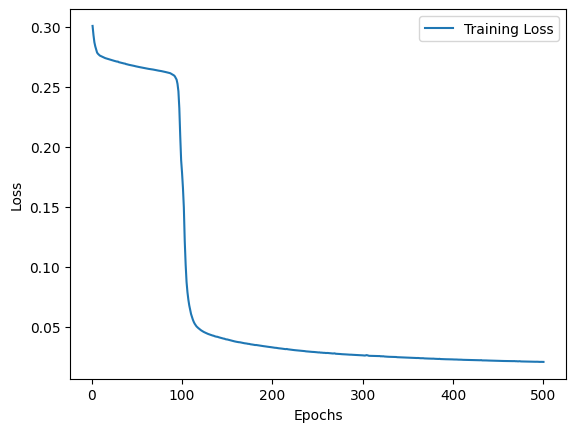

In [135]:
plotLos(history)

In [136]:
model.save('/home/model.keras')

# Тестирование сети

In [137]:
def plot_regression_line(x, y):
  slope, intercept = np.polyfit(x, y, 1)

  plt.plot(x, slope * x + intercept, color="red")
  plt.scatter(x, y, color = "m", marker = "o", s = 30)
  plt.show()

In [138]:
P_test, T_test = createData()

4/4 [==============================] - 0s 3ms/step


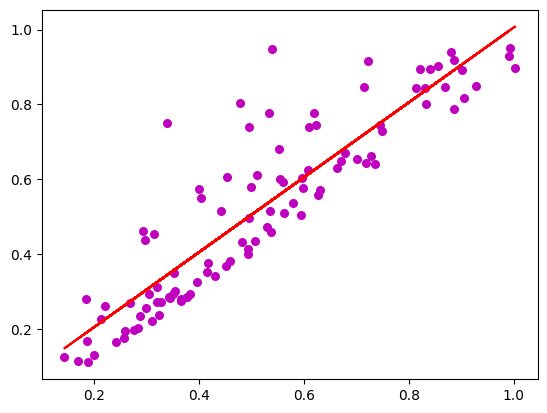

In [139]:
plot_regression_line(model.predict(P_test)[:, 0], T_test[:, 0])

# Задание.
# Исследование влияния шума на обучение
Исследовать влияние шума в исходных данных на результаты обучения нейронной сети. Для этого к исходному массиву данных прибавить случайные числа из диапазонов (0 – 0.01; 0 – 0.05; 0 – 0.1; 0 -0.2). Провести процедуру обучения и протестировать сеть.

In [140]:
def runModel(P, T, P_test, T_test, activation, optimizer, loss, epochs, modelname):

  model = Sequential([
        Dense(20, input_shape=(20,), activation=activation)
      , Dense(15, activation=activation)
      , Dense(3, activation=activation)
  ])
  model.summary()

  model.compile(optimizer=optimizer, loss=loss)

  history = model.fit(P, T, epochs=epochs)

  plotLos(history)

  model.save('/home/' + modelname + '.keras')

  predict = model.predict(P_test)

  if(not predict[:, 0].any(0) or not predict[:, 1].any(0) or not predict[:, 2].any(0)):
    print("Predict in 0")

  plot_regression_line(predict[:, 0], T_test[:, 0])
  plot_regression_line(predict[:, 1], T_test[:, 1])
  plot_regression_line(predict[:, 2], T_test[:, 2])

In [141]:
def createNoize(ampl):
  ret =  np.zeros((ARRAY_SIZE, 3))

  for i in range(0, ARRAY_SIZE):
    ret[i][0] = ampl*np.random.rand()
    ret[i][1] = ampl*np.random.rand()
    ret[i][2] = ampl*np.random.rand()
  return ret

In [142]:
X, Y = createData()
X_test, Y_test = createData()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 20)                420       
                                                                 
 dense_106 (Dense)           (None, 15)                315       
                                                                 
 dense_107 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 0.1760
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1661
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1592
Epoch 4/500
4/4 [==============================] - 0s

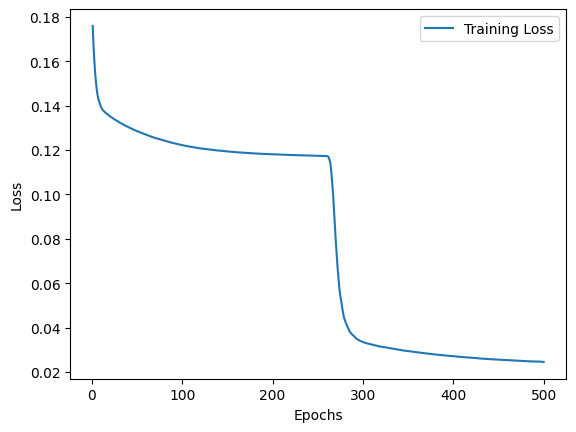

4/4 [==============================] - 0s 3ms/step


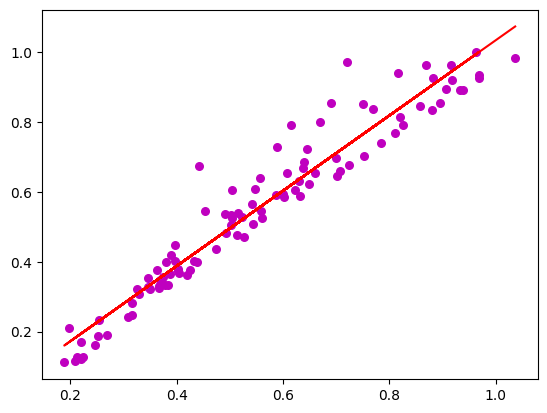

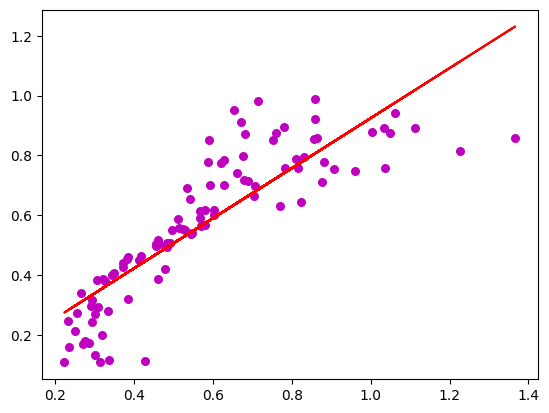

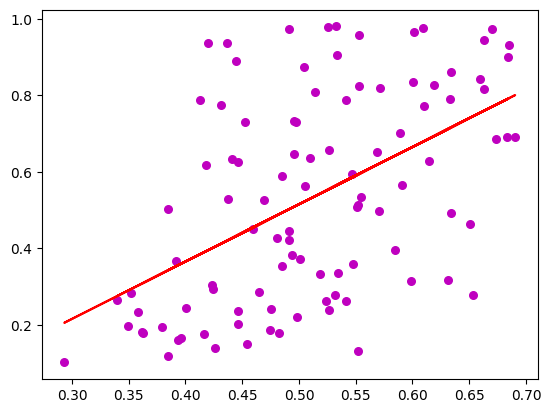

In [143]:
runModel(X, Y, X_test, Y_test, 'relu', 'sgd', 'mse', 500, "model1")

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 20)                420       
                                                                 
 dense_109 (Dense)           (None, 15)                315       
                                                                 
 dense_110 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3357
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3143
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2987
Epoch 4/500
4/4 [==============================] - 0s

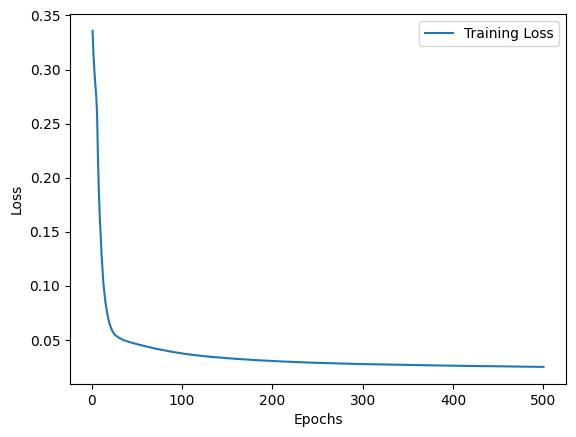

4/4 [==============================] - 0s 3ms/step


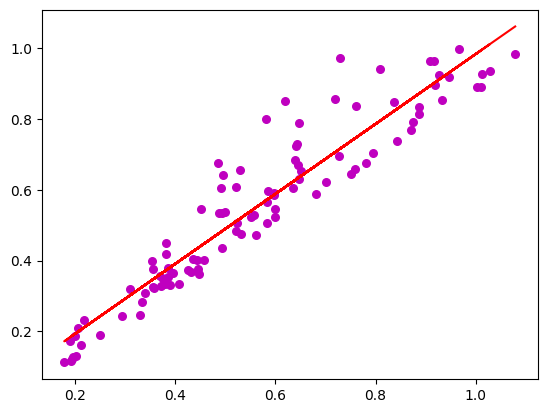

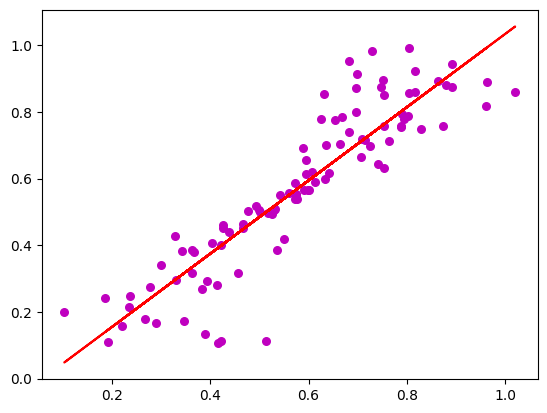

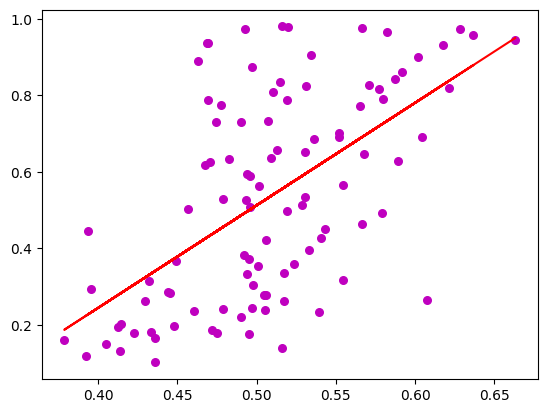

In [144]:
noize = createNoize(0.01)
runModel(X, Y + noize, X_test, Y_test, 'relu', 'sgd', 'mse', 500, "model1")

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 20)                420       
                                                                 
 dense_118 (Dense)           (None, 15)                315       
                                                                 
 dense_119 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3186
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3085
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2996
Epoch 4/500
4/4 [==============================] - 0s

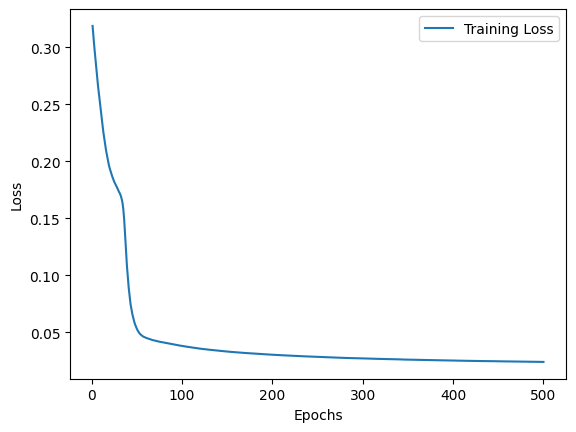

4/4 [==============================] - 0s 4ms/step


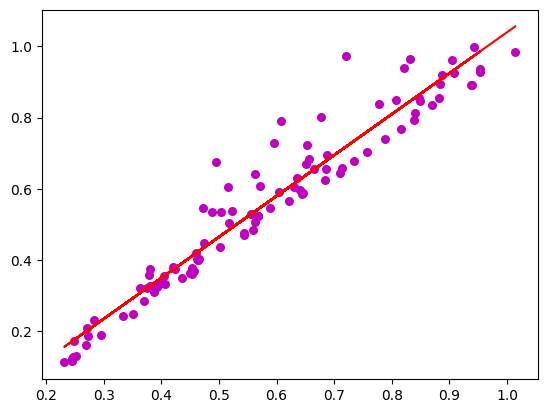

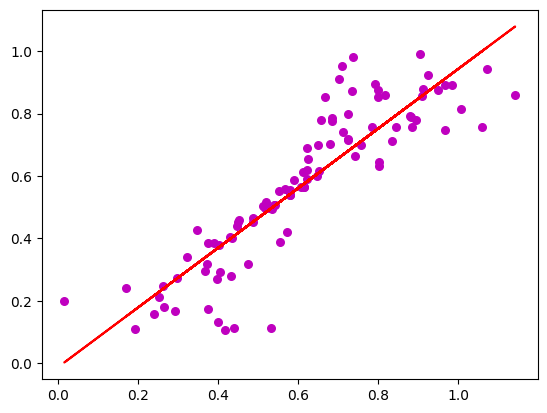

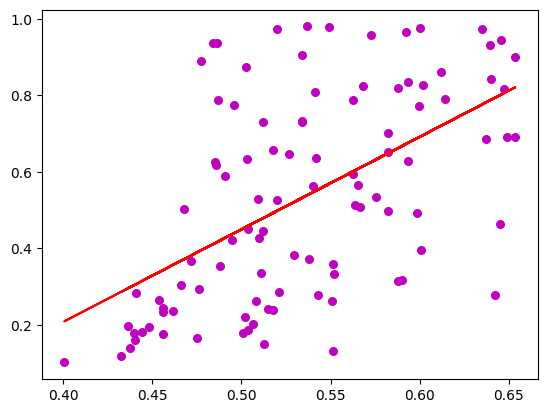

In [147]:
noize = createNoize(0.05)
runModel(X, Y + noize, X_test, Y_test, 'relu', 'sgd', 'mse', 500, "model1")

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 20)                420       
                                                                 
 dense_115 (Dense)           (None, 15)                315       
                                                                 
 dense_116 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2812
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2797
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2783
Epoch 4/500
4/4 [==============================] - 0s

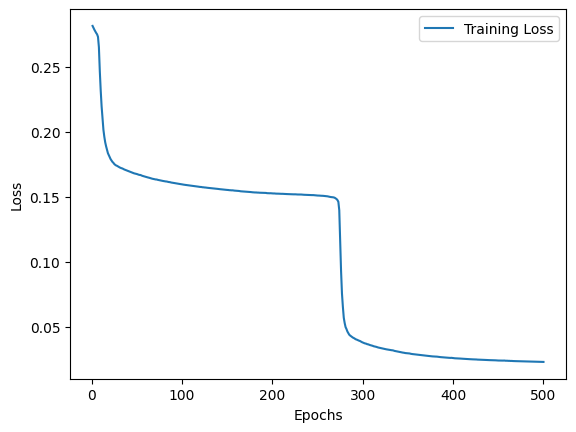

4/4 [==============================] - 0s 3ms/step


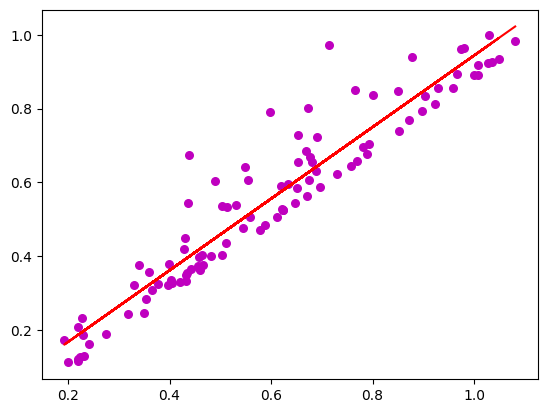

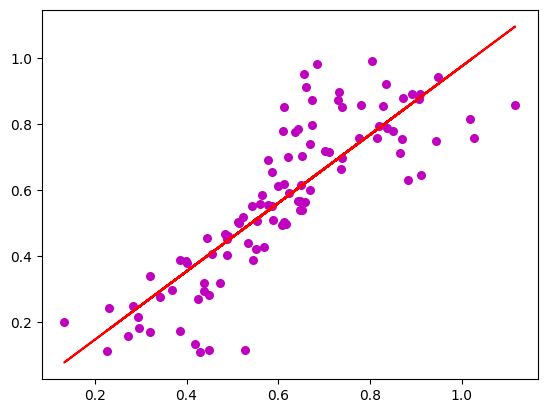

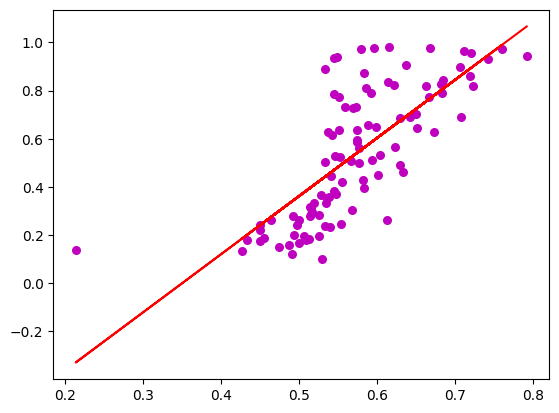

In [146]:
noize = createNoize(0.1)
runModel(X, Y + noize, X_test, Y_test, 'relu', 'sgd', 'mse', 500, "model1")

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 20)                420       
                                                                 
 dense_121 (Dense)           (None, 15)                315       
                                                                 
 dense_122 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1999
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1952
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1915
Epoch 4/500
4/4 [==============================] - 0s

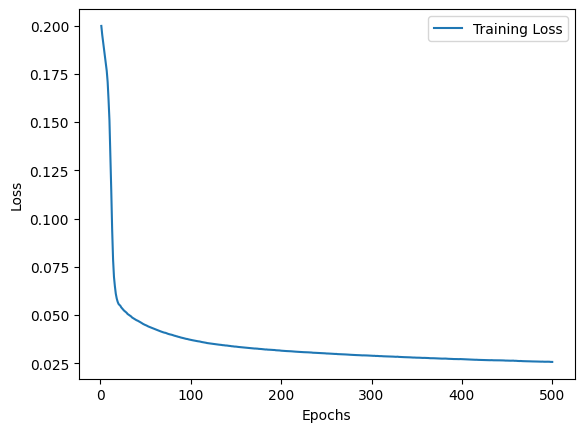

4/4 [==============================] - 0s 4ms/step


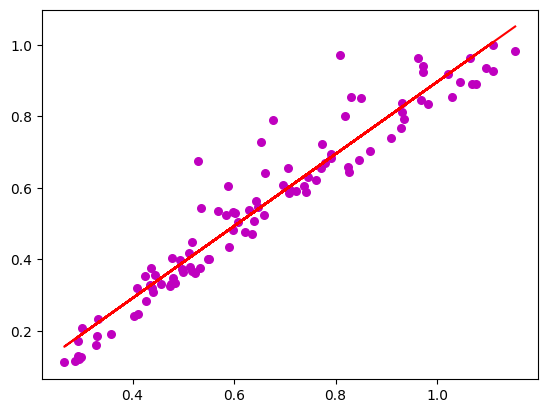

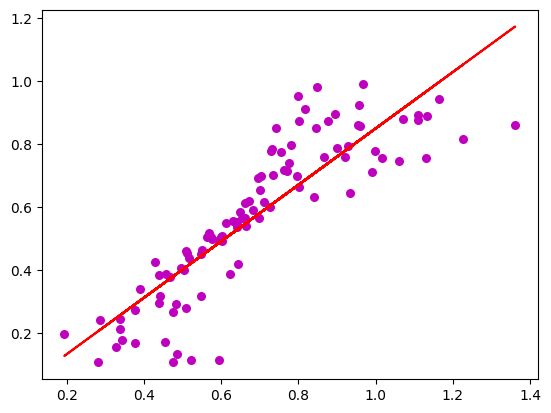

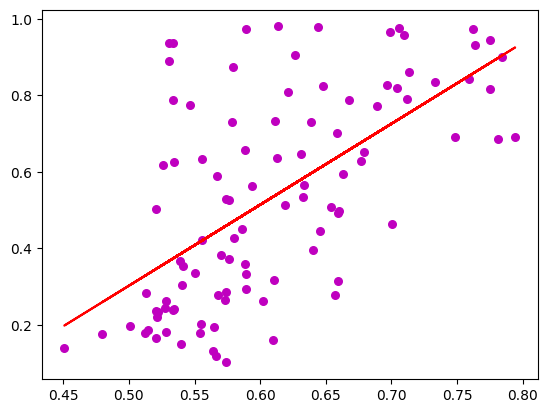

In [148]:
noize = createNoize(0.2)
runModel(X, Y + noize, X_test, Y_test, 'relu', 'sgd', 'mse', 500, "model1")

# 2. Сформировать исходный массив и массив эталонов из случайных чисел ипровести обучение сети. Прокомментировать результаты.

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 20)                420       
                                                                 
 dense_139 (Dense)           (None, 15)                315       
                                                                 
 dense_140 (Dense)           (None, 3)                 48        
                                                                 
Total params: 783 (3.06 KB)
Trainable params: 783 (3.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
32/32 [==============================] - 1s 3ms/step - loss: 0.1993
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1696
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.1137
Epoch 4/500
32/32 [============================

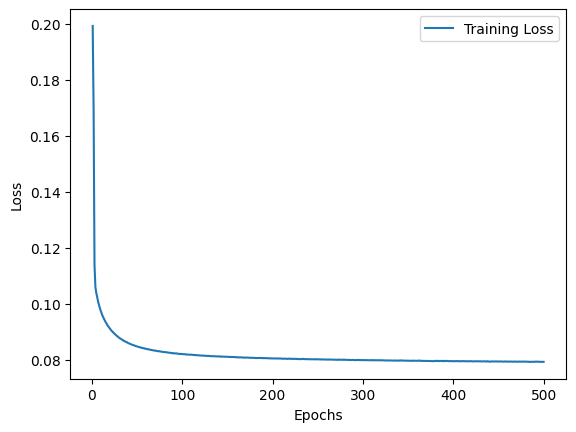

32/32 [==============================] - 0s 2ms/step


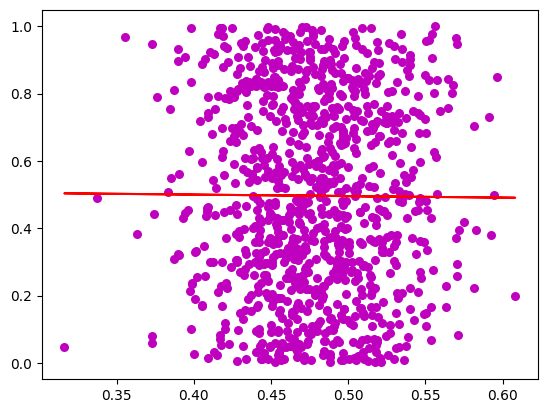

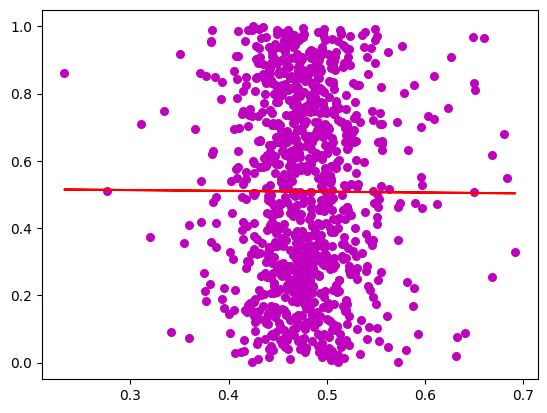

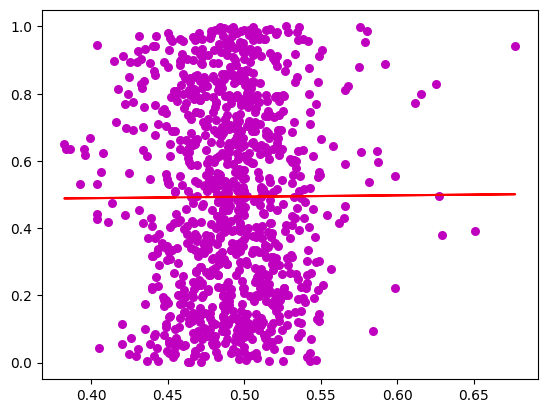

In [154]:
X_rand = np.random.rand(ARRAY_SIZE*10, 20)
Y_rand = np.random.rand(ARRAY_SIZE*10, 3)

X_rand_test = np.random.rand(ARRAY_SIZE*10, 20)
Y_rand_test = np.random.rand(ARRAY_SIZE*10, 3)

runModel(X_rand, Y_rand, X_rand_test, Y_rand_test, 'relu', 'sgd', 'mse', 500, "model1")